<a href="https://colab.research.google.com/github/brandondiazlopez/Small_Data_Mining_Projects/blob/main/Confusion_Matrix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries

import pandas as pd
from pandas import read_csv
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


This section was importing the proper libraries 

In [8]:
# 1 read XLSX file “Microsoft_Results.CSV” 

filename = 'Microsoft_Results.csv'
data = pd.read_csv(filename)


In [3]:

# Define Y_True and Y_pred

y_true = data['TRUE_STATUS']

y_pred = data['PRED_Probability'].round()

# confusion matrix (HOLY SHIT I think this is the one. For part of it at least.)
matrix = confusion_matrix(y_true, y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true, y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

print(f'Outcome values : \n True Positive: {tp}, \n False Negative {fn}, \n False Positive: {fp}, \n True Negative: {tn}')

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true, y_pred,labels=[1,0])
print('Classification report : \n',matrix)

#Specificity Calc

specificity = tn/(tn+fp)
print('Specificity Score:',specificity)

#sensitivity calculation
sensitivity = tp/(tp+fn)
print('Sensitivity : ', sensitivity )



Confusion matrix : 
 [[306004 192997]
 [170809 330190]]
Outcome values : 
 306004 192997 170809 330190
Outcome values : 
 True Positive: 306004, 
 False Negative 192997, 
 False Positive: 170809, 
 True Negative: 330190
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.61      0.63    499001
           0       0.63      0.66      0.64    500999

    accuracy                           0.64   1000000
   macro avg       0.64      0.64      0.64   1000000
weighted avg       0.64      0.64      0.64   1000000

Specificity Score: 0.6590631917428977
Sensitivity :  0.6132332400135471


In this section, the accuracy of the model is 0.64, which means that it correctly classified 64% of the instances. While this is not bad, it is not particularly high either. Additionally, the precision, recall, and F1 score for both classes are around 0.63 to 0.64, which indicates that the model's performance is relatively balanced for both classes.

The specificity score is 0.659, which is good, indicating that the model correctly identified about 66% of the instances that belong to the negative class. However, the sensitivity score is 0.613, which is not as good, indicating that the model missed identifying about 39% of the instances that belong to the positive class.

In [4]:
# 3.1 cut-off probability threshold of 0.3


threshold = .3

threshold1_data = data[data['PRED_Probability'] > threshold]

# Define Y_True and Y_pred

y_true = threshold1_data['TRUE_STATUS']

y_pred = threshold1_data['PRED_Probability'].round()

# confusion matrix (HOLY SHIT I think this is the one. For part of it at least.)
matrix = confusion_matrix(y_true, y_pred, labels=[1,0])
report = classification_report(y_true, y_pred, labels=[1,0])

print(f'Confusion Matrix: \n {matrix}')
print(f'\n Classification Report: \n {report}')



# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).reshape(-1)
# print('Outcome values : \n', tp, fn, fp, tn)

print(f'\n Outcome values : \n\n True Positive: {tp}, \n False Negative {fn}, \n False Positive: {fp}, \n True Negative: {tn}')

#Specificity Calc

specificity = tn/(tn+fp)
print('\n Specificity Score:',specificity)

#sensitivity calculation
sensitivity = tp/(tp+fn)
print('\n Sensitivity : ', sensitivity )

Confusion Matrix: 
 [[306004 172921]
 [170809 261216]]

 Classification Report: 
               precision    recall  f1-score   support

           1       0.64      0.64      0.64    478925
           0       0.60      0.60      0.60    432025

    accuracy                           0.62    910950
   macro avg       0.62      0.62      0.62    910950
weighted avg       0.62      0.62      0.62    910950


 Outcome values : 

 True Positive: 306004, 
 False Negative 172921, 
 False Positive: 170809, 
 True Negative: 261216

 Specificity Score: 0.6046316764076153

 Sensitivity :  0.6389392911207391


In this section we tried to change the cut-off probability to 30%. This didn't chnage much of the initial results.

In [5]:
# 3.2 cut-off probability threshold of 0.6


threshold = .6

threshold2_data = data[data['PRED_Probability'] > threshold]

# Define Y_True and Y_pred

y_true = threshold2_data['TRUE_STATUS']

y_pred = threshold2_data['PRED_Probability'].round()

# confusion matrix 
matrix = confusion_matrix(y_true, y_pred, labels=[1,0])
report = classification_report(y_true, y_pred, labels=[1,0])

print(f'Confusion Matrix: \n {matrix}')
print(f'\n Classification Report: \n {report}')



# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).reshape(-1)
# print('Outcome values : \n', tp, fn, fp, tn)

print(f'\n Outcome values : \n\n True Positive: {tp}, \n False Negative {fn}, \n False Positive: {fp}, \n True Negative: {tn}')

#Specificity Calc

specificity = tn/(tn+fp)
print('\n Specificity Score:',specificity)

#sensitivity calculation
sensitivity = tp/(tp+fn)
print('\n Sensitivity : ', sensitivity )

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix: 
 [[156745      0]
 [ 51740      0]]

 Classification Report: 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86    156745
           0       0.00      0.00      0.00     51740

    accuracy                           0.75    208485
   macro avg       0.38      0.50      0.43    208485
weighted avg       0.57      0.75      0.65    208485


 Outcome values : 

 True Positive: 156745, 
 False Negative 0, 
 False Positive: 51740, 
 True Negative: 0

 Specificity Score: 0.0

 Sensitivity :  1.0


Trying to change the treshold to 60% resulted in an error with the class 0 data.

In [6]:
#problem 4 AUC

array = data.values
X = array[:,2:]
Y = array[:,1]

test_size = .33

seed = 7

kfold = KFold(n_splits=10, random_state = seed, shuffle=True)
model = LogisticRegression(solver = 'liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print("AUC: %.3f" % (results.mean()))



#pring gini index

gini_index = 2 * (results.mean() - .5)
print("Gini Index: %.3f" % (gini_index))

AUC: 0.694
Gini Index: 0.388


The AUC Score here is considerably low. The Gini Index is around the same accord. Not particulary weak, but not considerably strong either.

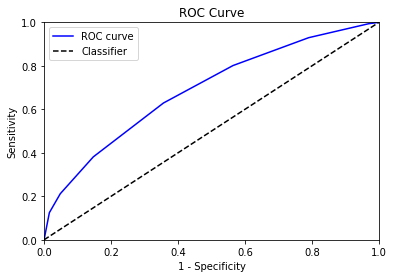

In [7]:
model = LogisticRegression()
model.fit(X, Y)

y_true = data['TRUE_STATUS']

y_pred = data['PRED_Probability'].round()

# get probabilities for positive class
probs = model.predict_proba(X)[:, 1]
cutoffs = np.arange(0, 1.1, 0.1)

#Calculate rates for each cutoff
tprs = []
fprs = []
for cutoff in cutoffs:
    y_pred = (probs >= cutoff).astype(int)
    matrix = confusion_matrix(y_true, y_pred, labels=[1,0])
    tp, fn, fp, tn = matrix.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tprs.append(tpr)
    fprs.append(fpr)

#Plot curve
plt.plot(fprs, tprs, 'b-', label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Classifier')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend()
plt.show()

This graph shows the relationship between sensitivity and specificity for the first threshold. 